<a href="https://colab.research.google.com/github/Baakchsu/LinearRegression/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

In [0]:
class LinearRegression:
   def fit(self,X,Y):
       X=np.array(X).reshape(-1,1)
       Y=np.array(Y).reshape(-1,1)
       x_shape = X.shape
       num_var = x_shape[1]       #the shape corresponds to number of input variable dimensions. There's only one for this dataset i.e weight of person
       self.parameter_cache = []       
       self.weight_matrix = np.random.normal(-1,1,(num_var,1))
       self.intercept = np.random.rand(1)
       for i in range(50):
           self.dcostdm = np.sum(np.multiply(((np.matmul(X,self.weight_matrix)+self.intercept)-Y),X))*2/x_shape[0] #partial derivative of cost w.r.t the weights
           self.dcostdc = np.sum(((np.matmul(X,self.weight_matrix)+self.intercept)-Y))*2/x_shape[0]                #partial derivative of cost w.r.t the intercept 
           self.weight_matrix -= 0.1*self.dcostdm                                                                  #updating the weights with the calculated gradients
           self.intercept -= 0.1*self.dcostdc                                                                      #updating the weights with the calculated gradients
           self.parameter_cache.append(np.array((self.weight_matrix,self.intercept)))                              #the parameters are cached just to track the progress 
       return self.weight_matrix,self.intercept,self.parameter_cache
   def predict(self,X):
       product = np.matmul(np.array(X).reshape(-1,1),self.weight_matrix)+self.intercept
       return product

In [0]:
reg = LinearRegression()

In [0]:
x = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y = (df["Height"]-df['Height'].mean())/df["Height"].std()

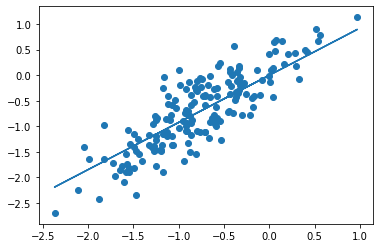

In [6]:
params = reg.fit(x[:-180],y[:-180])
plt.scatter(x[-180:],y[-180:])
pred = reg.predict(np.array(x[-180:]))
plt.plot(x[-180:],pred)
plt.savefig('plot_fit.png')

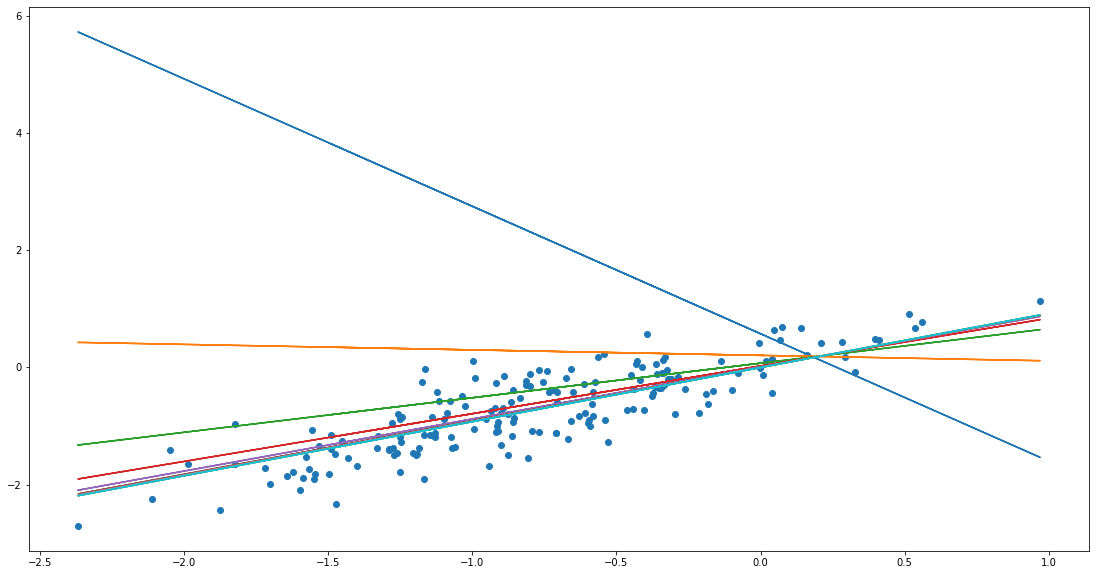

In [7]:
#print(params)

plt.figure(figsize=(19, 10))
plt.scatter(x[-180:],y[-180:])
for i in list(np.arange(0,50,5)):
  
  value = params[2][i]
  prediction = np.matmul(np.array(x[-180:]).reshape(-1,1),value[0])+value[1]
  plt.plot(x[-180:],prediction)
plt.savefig('cache_view.png')

  
  

In [13]:
!dir
from google.colab import files
files.download('plot_fit.png')
files.download('cache_view.png')


cache_view.png	plot_fit.png  sample_data
